

# Project: Analysis of the no-show appointment dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>This dataset is a collection of 110K medical appointments in the Brazil, the data is collected with the aim to determine if it is possible to predict if a patient will honor his or her scheduled medical appointment. 
This dataset contains 13 unique features and 1 target, in total there 14 columns.
##### Description of the features of the dataset
>1. *Patientid*: this is a unique key that identifies every patient 
2. **AppointmentID**: this is a unique key that identifies each seperate appiontment a patient makes 
3. **Gender**: This column describes the sex of the patient as Female (F) or Male (M)
4. **ScheduledDay**: The day the patient is required to honor the appointment
5. **AppointmentDay**: This is the day the patient books the appointment, either via call or in-person. The appointmentDay by must be earlier than the ScheduledDay for obvious reasons.
6. **Age**: How old the is patient in years
7. **Neighbourhood**: This identifies the center where the medical appointment is scheduled to take place (location of the hospital)
8. **Scholarship**: This columun identifies whether a patient is a beneficiary of the Brazilian family allowance . For more in depth description of this social welfare system.[Bolsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
9. **Hipertension**: True or False if a patient has hypertension
10. **Diabetes**: True or False if a patient has diabetes
11. **Alcoholism**: True or False if the patient is an Alcoholic
12. **Handcap**: True or False if a patient is handicap
13. **SMS_received**: This column determines if a patient received 1 or more sms message to remind them of their appointment
14. **No-Show**: This column, which is the target, determines if a patient did not show up for the appointment, if it is true it means patient did not honor their appointment, if false it means patient honored their scheduled appointment.



### Questions for Analysis
1. Does having a chronic medical condition (hypertension or diabetes) makes a patient more likely to honor a medical appointment ?
2. Are older patients more likely to default a scheduled medical appointment compared to their younger counterparts ?
3. Does receiving an sms reminder makes a patient more likely to honor a medical appointment ?
4. How does been on the scholarship influence patients' appointment attendance ?
 

### Importing all the important libraries/packages for the project

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



#### Loading the dataset into a pandas dataframe (df)

In [3]:
# Loading the dataset into a dataframe using pandas.
df=pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
# df.info()


### Data Cleaning
 

__From the inspection the dataset from above, there are some obvious errors that needs to be rectified__.

1. ScheduledDay and AppointmentDay needs to be converted to Datetime series instead of objects
2. Hipertension spelling corrected to *_Hypertension_*
3. Appointment ID and Patientid columns will be dropped as these unique to each patient will does not serve any purpose in answering of the questions posted above.
4. Column *No-Show*, will be coded into numerical values, and the "-" converted to "_"
5. Columns names will be converted to lowercase for uniformity


#### Dropping the redundant unique IDs columns (PatientId and AppointmentID)

In [4]:

df.drop(columns=["PatientId","AppointmentID"], inplace=True)


#### Converting ScheduledDay and AppointmentDay into datatime series

In [5]:
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])

####  Correcting the spelling of hipertension

In [6]:
df.rename(columns={"Hipertension":"Hypertension"}, inplace =True)

#### Coding the target column, No-Show. There two possible response for this column, Yes means the patient did not honor their appointment, No means the patient honored their appointment.
###### So all Yes -0 and No -1

In [7]:
df=df.replace(to_replace=['Yes','No'],value=['0','1'])

#### Rename the column No-show to No_show

In [8]:
df.rename(columns={"No-show":"No_show"}, inplace=True)

In [9]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No_show'],
      dtype='object')

#### For the purpose of uniformity all columns names will be changed to lowercase

In [10]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)


In [11]:
df.columns


Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does having a chronic medical condition (hypertension or diabetes) makes a patient more likely to honor a medical appointment ?)

#### I will be using the relative risk or risk ration (RR) to compare the likely of a patient with any of the above mentioned chronic medical conditions honoring their appointments with patients without any of the conditions honoring their appointment. 
#### This is because the features of the data contain categorical which are coded into binary data (0 &1), and therefore using other measures such as mean, median etc will give meaningless results.


#### **Using the groupby function to aggregate patients base on whether they are hypertensive or not**.
#### **The no_show column then subsetted to determine whether they honored their appointment**

#### Determining the proportion of patients that are hypertensive

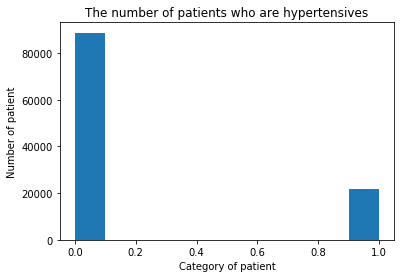

In [22]:
ax=df["hypertension"].plot( kind='hist',title='The number of patients who are hypertensives')
ax.set(xlabel="Category of patient")
ax.set(ylabel="Number of patient")
plt.show();


#### From the barchart above it shows that most of patients are not hypertensive (0) . The number of hypertensives slightly over 2000 compared to the non-hypertensives who are close to 90,000.

#### Determining the proportion of patients who are diabetic

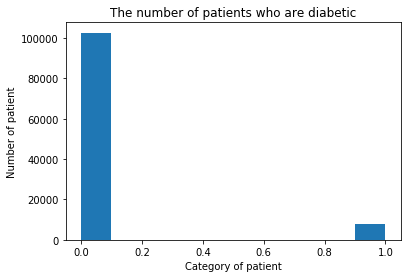

In [23]:
ax=df["diabetes"].plot(kind='hist', title='The number of patients who are diabetic')
ax.set(xlabel="Category of patient")
ax.set(ylabel="Number of patient")
plt.show();

#### The bar chart shows a staggering number of non-diabetics compared to diabetics in patient population

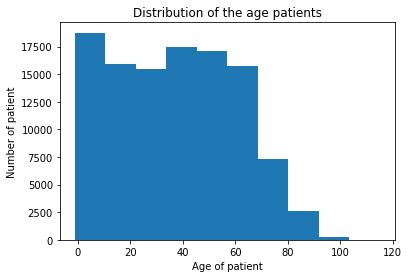

In [25]:
ax=df["age"].plot(kind='hist', title='Distribution of the age patients')
ax.set(xlabel="Age of patient")
ax.set(ylabel="Number of patient")
plt.show();

#### The histogram shows that there are relatively more younger patients, as evidenced by the left skewedness of the histogram. 

In [12]:
df_hyp=(df.groupby("hypertension")["no_show"].value_counts())
df_hyp


hypertension  no_show
0             1          70179
              0          18547
1             1          18029
              0           3772
Name: no_show, dtype: int64

### The cell below will generate a list of the number patients in each of the four  unique categories
1. First item will be showed and non-hypertensive
2. Second item will be no_show  and non-hypertenive
3. Third item will be showed and hypertenive
4. Fouth item will be no_show and hypertenive

In [12]:
prop_h=(df.groupby("hypertension")["no_show"].value_counts()).unique()
prop_h

array([70179, 18547, 18029,  3772])

In [13]:
show=[70179, 18029]
no_show=[18547, 3772]

### Plotting a stacked bar chart to demonstrate the proportion of patients who showed up in each category 
### Hypertensives Vs Non-Hypertensives

In [14]:
xlabels=["non-hypertensives", "hypertensives" ]


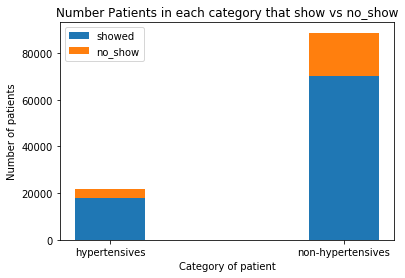

In [15]:
plt.bar(xlabels,show, width=.3, label="showed")
plt.bar(xlabels,no_show, width=.3, label="no_show", bottom=show)
plt.xlabel("Category of patient")
plt.ylabel("Number of patients")
plt.title("Number Patients in each category that show vs no_show")
plt.legend();

### The risk /probability of a hypertensive showing up for appointment

In [16]:

r_h=prop_h[2]/(prop_h[2]+prop_h[3])
r_h

0.82698041374248887

### The risk /probability of non-hypertensive showing up for appointment

In [17]:
r_nh=prop_h[0]/(prop_h[0]+prop_h[1])
r_nh

0.79096319004575888

### Relative risk of showing up among hypertensives

In [18]:
rr_h=r_h/r_nh
rr_h

1.0455359037563383

### Creating a function that takes three parameters to plot a bar chart for the Risk/Probability of showing up in each case scenario

In [24]:
#3 Defining a function
def plot(xlabel, values, colors):
    return plt.bar(xlabel,values, width=0.3, color=colors)

### Plotting a bar chart to show the probability of hypertensives and non-hypertensive showing up for appointment

In [25]:
xlabels=["Risk of hypertensive showing up", "Risk of non-hypertensive showing up"]
values=[r_h, r_nh]
colors=["b", "g"]

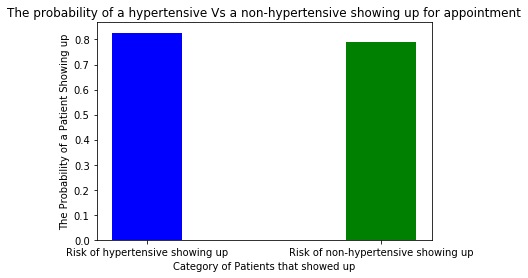

In [26]:
plot(xlabels, values, colors)
plt.xlabel("Category of Patients that showed up")
plt.ylabel("The Probability of a Patient Showing up")
plt.title("The probability of a hypertensive Vs a non-hypertensive showing up for appointment");


## Diabetics who honored their appointments

#### Using the groupby function to aggregate patients base on whether they are diabetic or not.
#### The no_show column then is subsetted to determine whether they honored their appointment

In [51]:

df_dm=(df.groupby("diabetes")["no_show"].value_counts())
df_dm

diabetes  no_show
0         1          81695
          0          20889
1         1           6513
          0           1430
Name: no_show, dtype: int64

### The cell below will generate a list of the number patients in each of the four unique categories
1. First item will be showed and non-diabetic
2. Second item will be no_show and non-diabetic
3. Third item will be showed and diabetic
4. Fouth item will be no_show and diabetic

In [27]:
prop_dm=(df.groupby("diabetes")["no_show"].value_counts()).unique()
prop_dm

array([81695, 20889,  6513,  1430])

In [28]:
show=[81695, 6513]
no_show=[20889, 1430]

### Plotting a stacked bar chart to demonstrate the proportion of patients who showed up in each category 
### Diabetic Vs Non-Diabetics

In [29]:
xlabels=["Non-diabetics", "Diabetics" ]

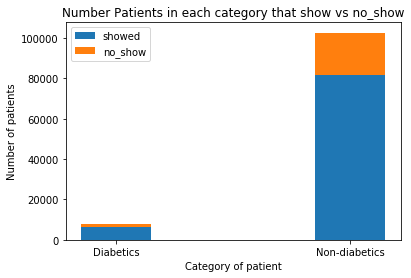

In [30]:
plt.bar(xlabels,show, width=.3, label="showed")
plt.bar(xlabels,no_show, width=.3, label="no_show", bottom=show)
plt.xlabel("Category of patient")
plt.ylabel("Number of patients")
plt.title("Number Patients in each category that show vs no_show")
plt.legend();

#### The risk of showing up among the diabetics

In [31]:

r_dm=prop_dm[2]/(prop_dm[2]+prop_dm[3])
r_dm

0.81996726677577736

#### The risk of showing up among the non-diabetics

In [32]:

r_ndm=prop_dm[0]/(prop_dm[0]+prop_dm[1])
r_ndm

0.79637175387974735

#### The relative risk (RR) of showing up among the diabetics

In [33]:

rr_dm=r_dm/r_ndm
rr_dm

1.0296287666922865

### Plotting a bar chart to show the probability of diabetics and non-diabetics showing up for appointment

In [34]:
xlabels=["Risk of diabetic showing up", "Risk of non-diabetic showing up"]
values=[r_dm, r_ndm]
colors=["b", "g"]

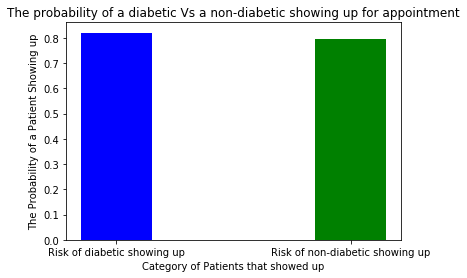

In [35]:
plot(xlabels, values, colors)
plt.xlabel("Category of Patients that showed up")
plt.ylabel("The Probability of a Patient Showing up")
plt.title("The probability of a diabetic Vs a non-diabetic showing up for appointment");

### Patients who are both hypertensive and Diabetic

In [36]:
df_dh=(df.groupby(["diabetes", "hypertension"])["no_show"].value_counts())
df_dh


diabetes  hypertension  no_show
0         0             1          69011
                        0          18258
          1             1          12684
                        0           2631
1         0             1           1168
                        0            289
          1             1           5345
                        0           1141
Name: no_show, dtype: int64

#### The above grouping will generate 8 categories of patients, but am only interested in just 2 of the categories
1. Patients who are both diabetic and hypertensive who showed up, 7th item in the list.
2. Patients who are not hypertensive or diabetic who showed up, 1st item in the list.

In [37]:

prop_hd=(df.groupby([ "hypertension", "diabetes"])["no_show"].value_counts()).unique()
prop_hd

array([69011, 18258,  1168,   289, 12684,  2631,  5345,  1141])

#### The risk of showing up among the hypertensive-diabetics

In [38]:
r_hd=prop_hd[6]/(prop_hd[6]+prop_hd[7])
r_hd

0.82408263953129823

#### The risk of showing among the non-hypertensive-diabetics

In [40]:
r_nhd=prop_hd[0]/(prop_hd[0]+prop_hd[1])
r_nhd

0.79078481476813067

#### Relative risk will be , risk among diabetics-hypertensives/ risk among non-diabetics-hypertensives

In [41]:
rr_hd=r_hd/r_nhd
rr_hd

1.0421073143304238

### Plotting a bar chart to compare the risk (probability) of hypertensive-diabetic and non-hypertensive-diabetic showing up for appointment

In [43]:
xlabels=["Risk of hypertensive-diabetic showing up", "Risk of non-hypertensive-diabetic showing up"]
values=[r_hd, r_nhd]
colors=["b", "g"]

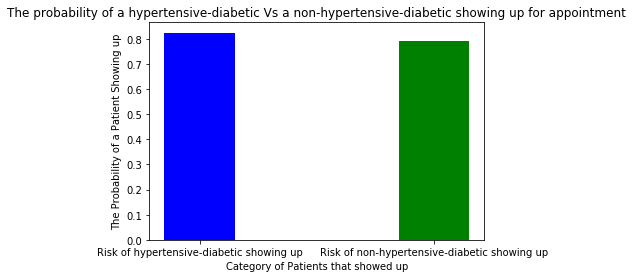

In [44]:
plot(xlabels, values,colors)
plt.xlabel("Category of Patients that showed up")
plt.ylabel("The Probability of a Patient Showing up")
plt.title("The probability of a hypertensive-diabetic Vs a non-hypertensive-diabetic showing up for appointment");

### Plotting a bar chart to compare the RR of showing up among patients with at least one chronic medical condition

In [45]:
xlabels=["RR_hypertensive showing up","RR_diabetic showing up","RR_hypertensive-diabetic showing up"]
values=[rr_h, rr_dm, rr_hd]
colors=['y', 'b', 'g']

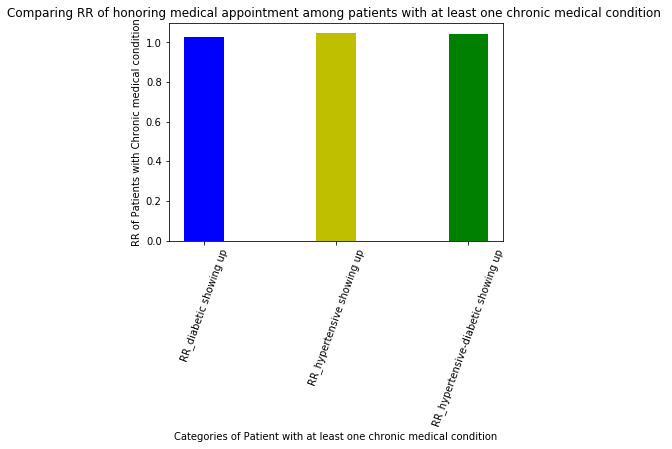

In [46]:
plot(xlabels, values, colors)
plt.xlabel("Categories of Patient with at least one chronic medical condition")
plt.ylabel("RR of Patients with Chronic medical condition")
plt.xticks(rotation=70)
plt.title("Comparing RR of honoring medical appointment among patients with at least one chronic medical condition ");

### Research Question 2  (Are older patients more likely default a scheduled medical appointment compared to their younger counterparts ?)

#### The age will be group into two categories, patients> 64yrs who are considered elderly in Brazil, and patient between 12 and 64yrs. 12 yrs because that is the age a n individual is considered an adolescent in Brazil, and  is entitled to privacy rights and confidentiality. Patients who are 12yrs and above can therefore seek medical care without parental consent.
#### Patients younger thab 12yrs are therefore considered minors who attending of medical appointment depends on their parents.

### Creating two different dataframes, one for each age grouping (12-64yrs &>64yrs)

In [48]:
# This will create two different dataframes using the pandas query function

## Dataframe of elderly patients (age >64yrs)
df_old=df.query("age>=65")

## Dataframe of younger patients (age 12-64yrs)
df_young=df.query("age>=12 and age<65")


#### Creating a table of elderly patients that showed up and those that did not show up

In [49]:
df_old['no_show'].value_counts()

1    12169
0     2233
Name: no_show, dtype: int64

#### This will create a list of elderly patients
1. First item in the list will be elderly patients who showed up for their appointments
2. Second item will be elderly patients who failed to honor their medical appointment

In [50]:
prop_old=df_old['no_show'].value_counts().unique()
prop_old

array([12169,  2233])

#### Creating a table of young patients that showed up and those that did not show up

In [53]:
df_young['no_show'].value_counts()

1    60129
0    16051
Name: no_show, dtype: int64

In [54]:
prop_young=df_young['no_show'].value_counts().unique()
prop_young

array([60129, 16051])

### Risk / probability of showing up among both the elderly and young patients

In [55]:
## Using the theory of relative risk to determine if an elderly patient is more likely to default a medical appointment
## compared to younger patients


# Risk of an elderly patient showing up 
r_old=prop_old[0]/(prop_old[0]+prop_old[1])
r_old

# Risk of a young patient showing up
r_young=prop_young[0]/(prop_young[0]+prop_young[1])
r_young


0.78930165397742191

#### Relative risk (RR) of showing up among elderly patients

In [56]:
### Relative Risk of an elderly patient honoring their appointment 
rr_old=r_old/r_young
rr_old

1.0705059158683476

### Plotting a bar chart to compare the risk (probability) of elderly and young  patient showing up for appointment

In [58]:
xlabels=["RR of elderly patient showing up", "RR of young patient showing up"]
values= [r_old, r_young]
colors =['b', 'g']

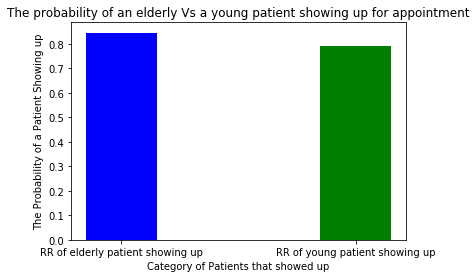

In [59]:
plot(xlabels, values, colors)
plt.xlabel("Category of Patients that showed up")
plt.ylabel("The Probability of a Patient Showing up")
plt.title("The probability of an elderly Vs a young patient showing up for appointment");

### Research Question 3  (Does receiving an sms reminder makes a patient more likely to honor a medical appointment ?)

#### Creating a table of patients who received at least 1 sms, who showed up and those that did not show up

In [60]:
df.groupby("sms_received")["no_show"].value_counts()

sms_received  no_show
0             1          62510
              0          12535
1             1          25698
              0           9784
Name: no_show, dtype: int64

### The cell below will generate a list of the number patients in each of the four unique categories
1. First item will be showed and no sms_received
2. Second item will be no_show and no sms_received
3. Third item will be showed and sms_received
4. Fouth item will be no_show and sms_received

In [61]:
prop_sms=df.groupby("sms_received")["no_show"].value_counts().unique()
prop_sms

array([62510, 12535, 25698,  9784])

#### The risk / probability of showing uo among patients who received at least 1 sms

In [62]:
## Risk of showing up among patients who received at least 1 message
# patients who received sms who showed up/ total number of patients who received sms
r_sms=prop_sms[2]/(prop_sms[2]+prop_sms[3])
r_sms

0.72425455160363006

#### The risk / probability of showing up among patients who did not receive any sms

In [63]:
## Risk of showing up among patients who did not received any message
# patients who did not received sms who showed up/ total number of patients who did not received sms
r_nsms=prop_sms[0]/(prop_sms[0]+prop_sms[1])
r_nsms

0.83296688653474582

#### The Relative Risk (RR) of showing up among patients who received at least 1 sms

In [64]:
## Relative Risk of showing up after receiving at least 1 sms
rr_sms=r_sms/r_nsms
rr_sms

0.86948780715236629

### Plotting a bar chart to compare the risk /probability of showing up among patients that received at least 1 sms and those that did not receive any sms

In [65]:
xlabels=["sms_patient", "No sms_patient"]
values=[r_sms, r_nsms]
colors=['y', 'g']

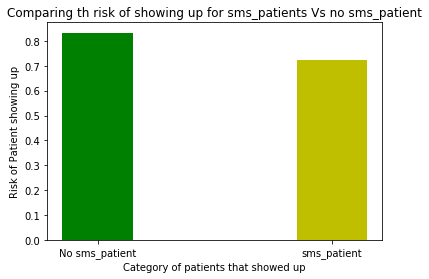

In [66]:
plot(xlabels, values, colors)
plt.xlabel("Category of patients that showed up")
plt.ylabel("Risk of Patient showing up")
plt.title('Comparing th risk of showing up for sms_patients Vs no sms_patient');

### Research Question 4  ( How does been on the a scholarship influence patients' appointment attendance ?)

#### Creating a table of patients base on their scholarship status and whether they showed up or not

In [67]:
df.groupby("scholarship")["no_show"].value_counts()

scholarship  no_show
0            1          79925
             0          19741
1            1           8283
             0           2578
Name: no_show, dtype: int64

### The cell below will generate a list of the number patients in each of the four unique categories
1. First item will be showed and no scholarship
2. Second item will be no_show and no scholarship
3. Third item will be showed and have scholarship
4. Fouth item will be no_show and have scholarship

In [69]:
prop_sch=df.groupby("scholarship")["no_show"].value_counts().unique()
prop_sch

array([79925, 19741,  8283,  2578])

#### The risk/probability of showing up among scholarship patients

In [70]:
## Risk of showing up among patients who are on scholarship
# patients who are on scholarship who showed up/ total number of patients who are on scholarship
r_sch=prop_sch[2]/(prop_sch[2]+prop_sch[3])
r_sch

0.76263695792284325

#### The risk / probability of showing up among non-scholarship patients

In [71]:
## Risk of showing up among patients who are not on scholarship
# patients who are not on scholarship who showed up/ total number of patients who are not on scholarship
r_nsch=prop_sch[0]/(prop_sch[0]+prop_sch[1])
r_nsch

0.80192844099291638

#### The Relative Risk of showing up among scholarship patients

In [72]:
## Relative Risk of showing up among patients who are on scholarship
rr_sch=r_sch/r_nsch
rr_sch

0.95100375412371718

### Plotting a bar chart to compare the  risk/probability of showing up among scholarship and non-scholarship patients

In [73]:
xlabels=["Scholarship_patient", "Non-scholarship_patient"]
values= [r_sch, r_nsch]
colors=['y', 'g']

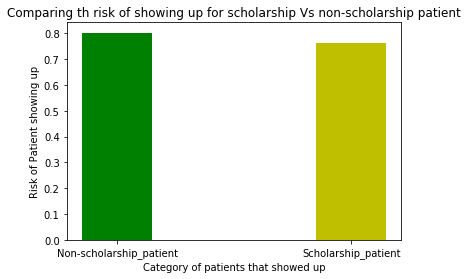

In [74]:
plot(xlabels, values, colors)
plt.xlabel("Category of patients that showed up")
plt.ylabel("Risk of Patient showing up")
plt.title('Comparing th risk of showing up for scholarship Vs non-scholarship patient');

<a id='conclusions'></a>
## Conclusions

#### Questions for Analysis

##### Interperations and possible conclusions that can be drawn from the relative risk values of the analysis

> **Q1**. __Does having a chronic medical condition (hypertension or diabetes) makes a patient more likely to honor a medical appointment?__
 From the analysis,  hypertensives are  approx. 1.05 times more likely to show up for their appointment compared to non-hypertensive, in other words hypertensives are 5% more likely to honor their medical appointments compared to non-hypertensives.
With regards to diabetes, they are 1.03 times more likely to show up for their appointment compared to non-diabetics, which can be restated as, diabetics are 3% more likely to honor their medical appointment compared to non-diabetics.
Patients with both diseases (hypertensive & diabetes) are 1.04 times or 4%  more likely to show up for their appointment compared to patients who do not have any of these chronic medical conditions.
In general, there seems to a be a higher tendency for patients with chronic medical conditions to honor their medical appointment.  Though this only suggests a correlation and not a causation, **one possible explanation for this pattern** could be the fact that patient diagnosed with these conditions would have been counselled extensively on the needs for regular check up and the consequences of defualt.  

>**Q2**. __Are older patients more likely to default a scheduled medical appointment compared to their younger counterparts?__
There are possible reasons for one to think that elderly patients might have a higher default rate, 
1.For instance, one could say that alzheimers(a neurodegenerative disease that cause patients to forget things) which is common among the elderly population, could make the elderly patients more likely not to show up for their appointment.
2.Elderly patients are more likely to have issues with mobility and therefore might have higher default rate because they need assistance to go about their activitiies of daily living.
These and many more hypothesis could be be posited.
**But a look at the results from the analysis tells a different story.**
From the analysis elderly patients are 1.071 times or 7% morely likely to attend medical appointment compared to younger pateints.
**Possible explanation for this observation**
1.Generally, people tend to develop chronic medical conditions especially hypertension and diabetes as they grow older, this therefore means that the frequency of hypertension and diabetes might be higher among the elderly patients in the dataset, and since we have already established a correlation been high hospital attendance and these medical conditions, could be accounting for the higher hospital attendance.
**In order to confirm this, one might have to do further analysis such as grouping hypertension and diabetes by age and determine the counts to see if there are more elderly patients with these this conditions.**
2.Another possible reason for this observation, could be elderly patients might have a less busy schedule compared to their younger counterparts, since elderly patients are more likely to be on retirement. 
**To confirm this, one will need more information, such as the main reason for not showing up, (if the reason is time constrains)**

>**Q3**. __Does receiving an sms reminder makes a patient more likely to honor a medical appointment?__
The results of the relative risk or probability for patients who received at least 1 sms is 0.87, which means that they 13% less likely to show up for their appointment compared to patients who did not received any message at all.
This results is however counterintuitive and therefore warrants some more information and further investigations.
**What could be accounting this results?**
1.Could it be that though the sms were sent they were never read/opened?
2.Could it be that there were a particular age group or patients with particular diagnosis that were sent sms, other words, were the sms sent to patients who were known to have high defualt rate?
Answers these and many other questions could throw some light on the results and make a more concrete conclusion.

>**Q4**. __How does been on the scholarship influence patients' appointment attendance?__
The results shows that patients who are on scholarship are 5% less likely to show up for their scheduled medical appointments compared to patients who are not on scholarship.
__Possible explanation for this observation :__
The Brazilian family allowance (Bolsa Familia), one the most popular social welfare system in the world, is targeted at people who are living in poverty. This means that all the patients under the scholarship are generally poor compared to their counterparts who are not on the scholarship. 
Poverty could their be accounting for the higher default rate among the patients who are on the scholarship, since they might not be able to pay for hospital bills.

#### Limitations
> One major limitation with doing just a descriptive analysis as done here, is the fact the results and conclusions are only tentative, without inferential statistics to perform test of significance on the results, one cannot tell if the findings are significant or by mere chance.

